In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA = pd.read_csv("RTP.csv")
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dimension   600 non-null    int64  
 1   block_size  600 non-null    int64  
 2   failures    600 non-null    int64  
 3   mode        600 non-null    object 
 4   rw_ratio    600 non-null    float64
 5   read_user   600 non-null    float64
 6   read_proc   600 non-null    float64
 7   read_wall   600 non-null    float64
 8   write_user  600 non-null    float64
 9   write_proc  600 non-null    float64
 10  write_wall  600 non-null    float64
dtypes: float64(7), int64(3), object(1)
memory usage: 51.7+ KB


In [3]:
from matplotlib.ticker import StrMethodFormatter
from functools import reduce


def plot(x: str, **params):
    # Get data
    AND = lambda a, b: a & b
    sample = DATA[reduce(AND, (DATA[k] == v for k, v in params.items()))].set_index(x)

    if sample.index.dtype.name.startswith("int"):
        plt.gca().xaxis.major.locator.set_params(integer=True)

    # Plot data
    sample.read_user.plot(style="-o", label="read user", color="blue")
    sample.read_wall.plot(style="--o", label="read wall", color="blue")
    sample.write_user.plot(style="-x", label="write user", color="red")
    sample.write_wall.plot(style="--x", label="write wall", color="red")

    # Prettyfy the plot
    plt.ticklabel_format(axis="y", style="sci", scilimits=(6, 6), useOffset=False)
    plt.gca().yaxis.offsetText.set_visible(False)
    plt.ylabel("megabytes/s")
    plt.legend()

    # Set the title, replacing "l" & "r" with a more concise name
    match params.get("mode"):
        case "l":
            params["mode"] = "linear"
        case "r":
            params["mode"] = "randomized"
    plt.title(", ".join(sorted(f"{k} = {v}" for k, v in params.items())))

    # Done!
    plt.show()

In [4]:
DEFAULT_BS = 512
DEFAULT_DIM = 6
DEFAULT_FAIL = 3
DEFAULT_MODE = "l"
DEFAULT_RW = 0.5

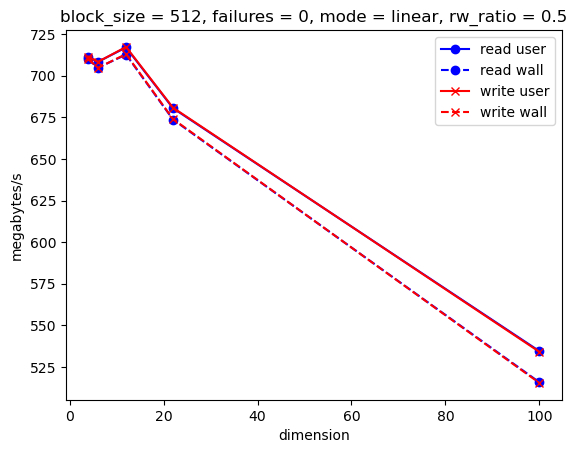

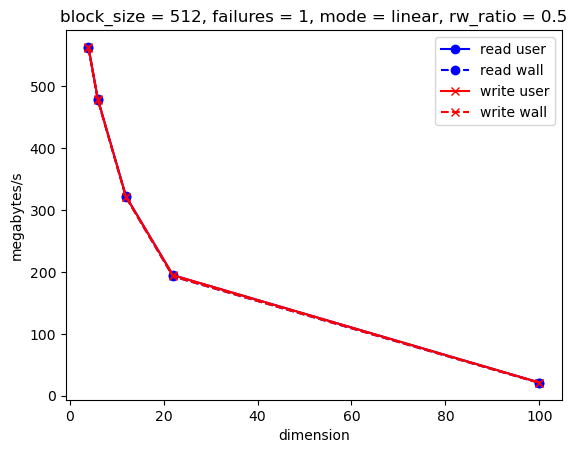

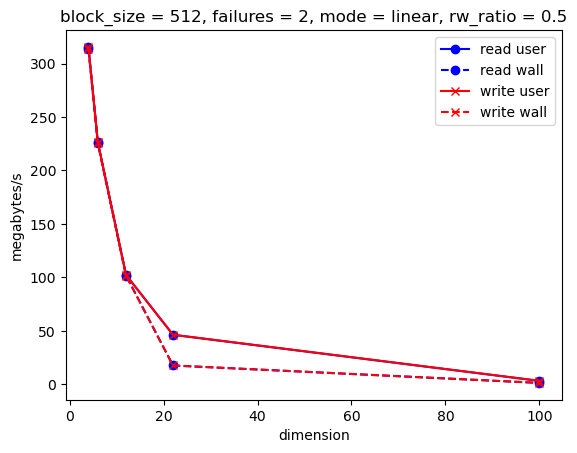

In [5]:
for failures in range(3):
    plot(
        "dimension",
        block_size=DEFAULT_BS,
        failures=failures,
        mode=DEFAULT_MODE,
        rw_ratio=DEFAULT_RW,
    )

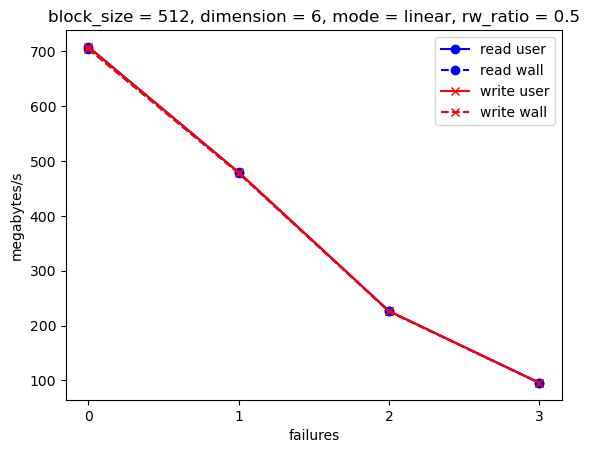

In [6]:
plot(
    "failures",
    block_size=DEFAULT_BS,
    dimension=DEFAULT_DIM,
    mode=DEFAULT_MODE,
    rw_ratio=DEFAULT_RW,
)

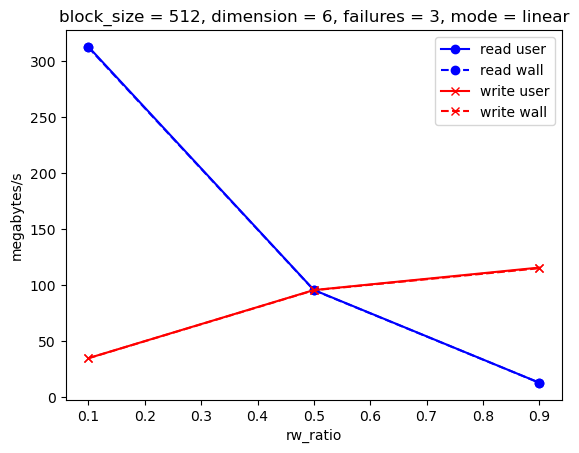

In [7]:
plot(
    "rw_ratio",
    block_size=DEFAULT_BS,
    dimension=DEFAULT_DIM,
    failures=DEFAULT_FAIL,
    mode=DEFAULT_MODE,
)

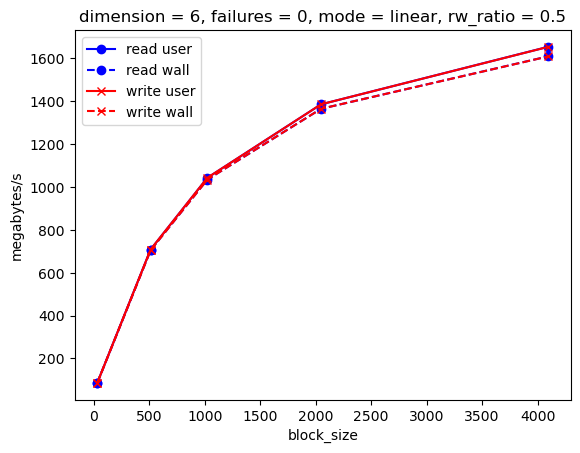

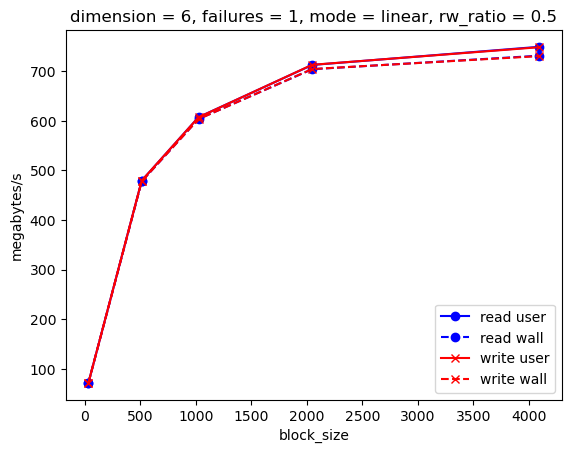

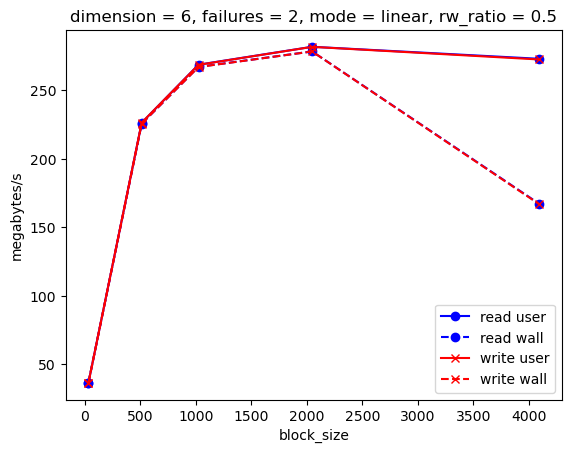

In [8]:
for failures in range(3):
    plot(
        "block_size",
        dimension=DEFAULT_DIM,
        failures=failures,
        mode=DEFAULT_MODE,
        rw_ratio=DEFAULT_RW,
    )